# Hello, Python world!  

In [5]:
# make charts prettier ?
plt.style.use('ggplot')

In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [6]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Features:
  * TV: advertising dollars spent on TV;
  * Radio: adv. dollrs spent on Radio;
  * Newspaper: ...

Response:
  * Sales: sales of a single product.  
  

In [10]:
# print the shape of the DataFrame
data.shape

(200, 4)

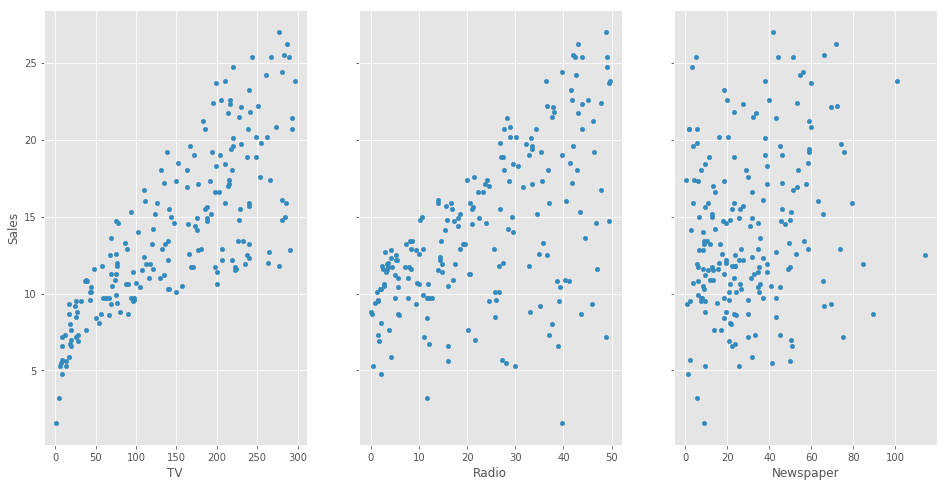

In [36]:
# visualize the relationship between features & response
# use scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [32]:
# standard import ?
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

=> a "unit" increase in TV ad spending <=> a 0.047537 "unit" increase in Sales.
<=> 1000 spent in TV ad => 47.537 more widgets sold.

In [22]:
# TV ad spend 50,000 => what predicition for sales?
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [23]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 9.40942557])

In [24]:
# min & max values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [25]:
# make predictions of those x values and store them
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

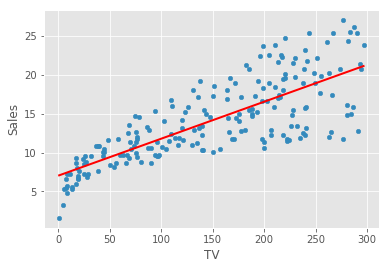

In [38]:
# plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [57]:
# confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


---  

## The Titanic example

In [8]:
import numpy as np

In [9]:
titanic = pd.read_csv('https://dl.dropboxusercontent.com/u/116126/datasets/titanic/train.csv', sep = ',')

In [42]:
# dimenstions
titanic.shape

(891, 12)

In [43]:
# column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
# first rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# clean-up
city_names = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
titanic["EmbarkedCode"] = titanic["Embarked"]
titanic["Embarked"] = titanic["EmbarkedCode"].apply(lambda value: city_names.get(value))

In [46]:
# check
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EmbarkedCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,S


In [11]:
# tell matplotlib to render graphs inside this notebook
# huh?
%matplotlib inline

In [12]:
# contingency table
pd.crosstab(titanic.Pclass, titanic.Survived, margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
# percentages
pd.crosstab(titanic.Pclass, titanic.Survived, margins = True).apply(lambda row: row/len(titanic))

Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


In [26]:
# same as
pd.crosstab(titanic.Pclass, titanic.Survived, margins = True, normalize = 'all')

Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


In [30]:
# percentages per class
pd.crosstab(titanic.Pclass, titanic.Survived, margins = True).apply(lambda row: row/row.sum(), axis = 1)
# hm? why the 50s?

Survived,0,1,All
Pclass,,,
1,0.185185,0.314815,0.5
2,0.263587,0.236413,0.5
3,0.378819,0.121181,0.5
All,0.308081,0.191919,0.5


In [29]:
# same as
pd.crosstab(titanic.Pclass, titanic.Survived, margins = True, normalize = 'index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


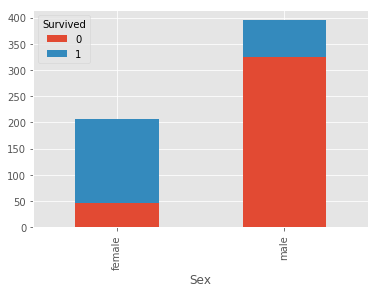

In [31]:
# stacked bar sex vs. survivability, only people older than 18 y.
titanic[titanic.Age >= 18].groupby(["Sex", "Survived"]).count().unstack("Survived")["PassengerId"].plot(kind="bar", stacked = True)

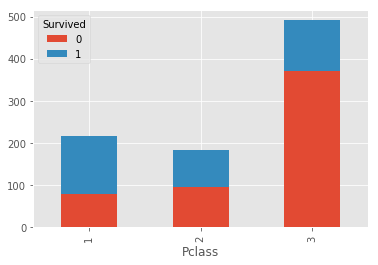

In [51]:
# what about classes?
titanic.groupby(["Pclass", "Survived"]).count().unstack("Survived")["PassengerId"].plot(kind="bar", stacked = True)

---
## The Video Game Sales example

In [58]:
games = pd.read_csv("https://dl.dropboxusercontent.com/u/116126/datasets/videogames/data.csv", sep = ",")

In [59]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
by_publisher = games.groupby("Publisher").agg({"NA_Sales": sum,
                                               "EU_Sales": sum,
                                               "JP_Sales": sum,
                                               "Global_Sales": sum,
                                               "Critic_Score": np.mean})
by_publisher.head()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.0,0.11,42.000000
1C Company,0.01,0.07,0.0,0.10,73.000000
20th Century Fox Video Games,1.82,0.10,0.0,1.94,NaN
2D Boy,0.00,0.03,0.0,0.04,90.000000
3DO,6.48,3.04,0.0,10.12,57.470588


In [61]:
top_publishers = by_publisher.sort_values("Global_Sales", ascending = False)[0:15][["NA_Sales", "EU_Sales", "JP_Sales"]]
top_publishers

,NA_Sales,EU_Sales,JP_Sales
Publisher,,,
Nintendo,816.97,419.01,458.15
Electronic Arts,599.50,373.91,14.35
Activision,432.59,215.90,6.71
Sony Computer Entertainment,266.17,186.56,74.15
Ubisoft,252.74,161.99,7.52
Take-Two Interactive,222.94,119.25,5.93
THQ,207.72,93.78,5.01
Konami Digital Entertainment,91.90,68.98,91.40
Sega,108.61,80.66,57.06


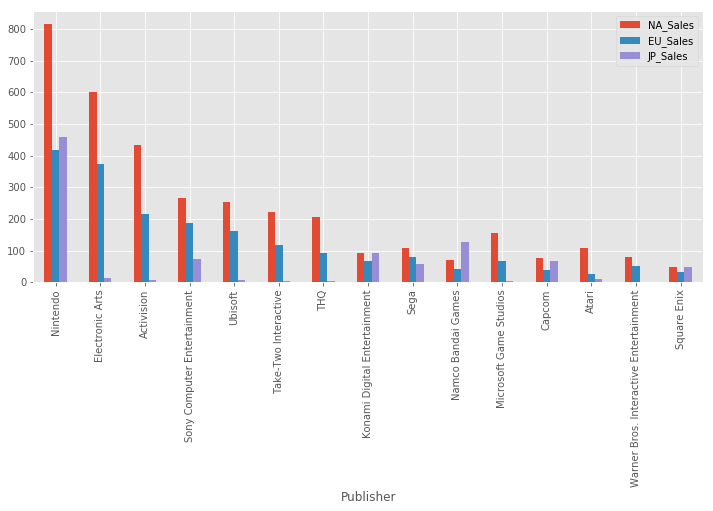

In [62]:
top_publishers.plot(kind="bar", figsize=(12,5))

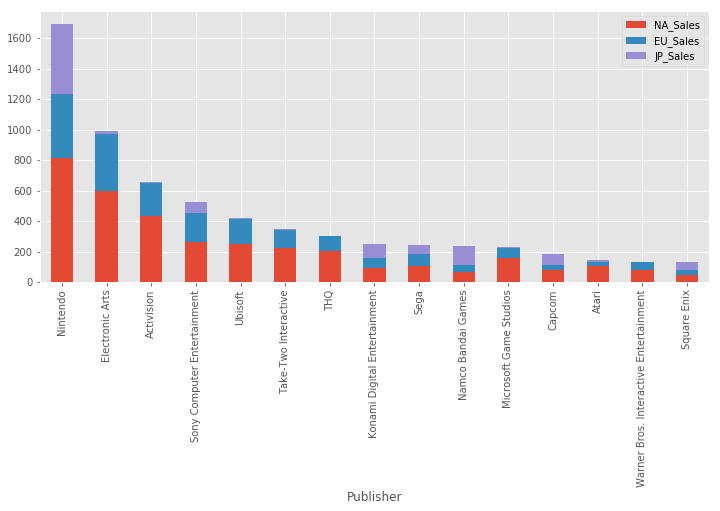

In [63]:
top_publishers.plot(kind="bar", stacked = "True", figsize=(12,5))